# Task A

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
population = pd.read_csv('Population.csv')

## A1

Text(0.5,1,'Population growth over time')

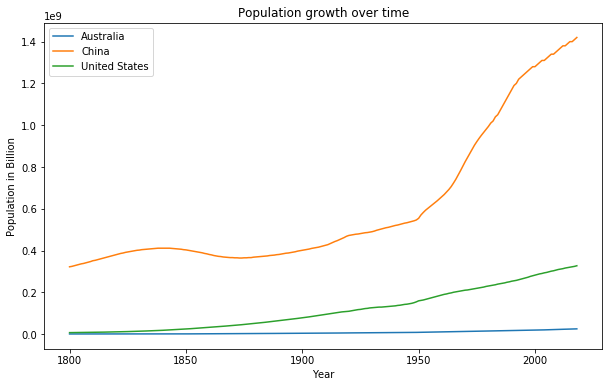

In [3]:
pop = population[['Year','Australia','China','United States']]
fig = pop.plot(kind='line',x='Year',figsize=(10,6))
fig.set_ylabel('Population in Billion')
fig.set_title('Population growth over time')

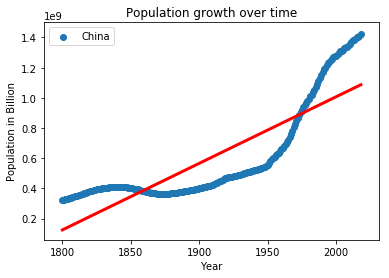

In [4]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(pop['Year'],pop['China'])
line = [slope*xi + intercept for xi in pop['Year']]
plt.plot(pop['Year'],line,'r-', linewidth=3)
plt.scatter(pop['Year'],pop['China'])
plt.legend()
plt.ylabel('Population in Billion')
plt.xlabel('Year')
plt.title('Population growth over time')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(pop[['Year']],pop[['China']])
X_predict = [[2100]]
y_predict = linreg.predict(X_predict)
print('Predictive population: ',y_predict)

Predictive population:  [[1.44859486e+09]]


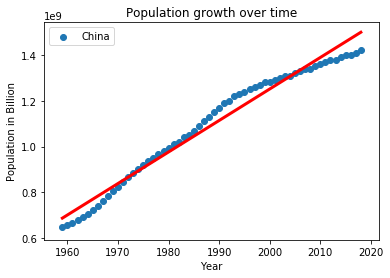

In [6]:
recentpop=pop.tail(60)
slope, intercept, r_value, p_value, std_err = linregress(recentpop['Year'],recentpop['China'])
line = [slope*xi + intercept for xi in recentpop['Year']]
plt.plot(recentpop['Year'],line,'r-', linewidth=3)
plt.scatter(recentpop['Year'],recentpop['China'])
plt.legend()
plt.ylabel('Population in Billion')
plt.xlabel('Year')
plt.title('Population growth over time')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(recentpop[['Year']],recentpop[['China']])
X_predict = [[2100]]
y_predict = linreg.predict(X_predict)
print('Predictive population: ',y_predict)

Predictive population:  [[2.62830089e+09]]


## A2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
geneq = pd.read_csv('GenderEquality.csv')

Text(0.5,1,'Gender ratio over time')

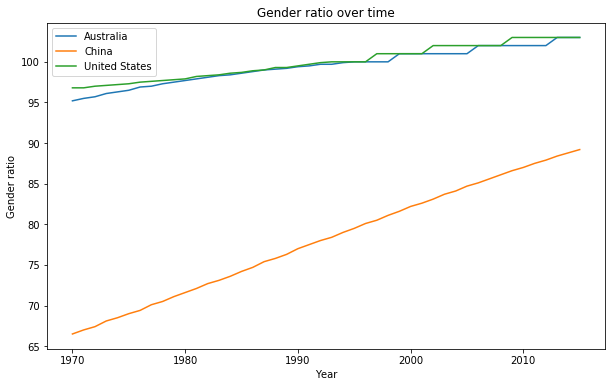

In [3]:
gen = geneq[['Year','Australia','China','United States']]
fig = gen.plot(kind='line',x='Year',figsize=(10,6))
fig.set_ylabel('Gender ratio')
fig.set_title('Gender ratio over time')

In [11]:
gen['Australia'].min()

95.2

In [12]:
gen['Australia'].max()

103.0

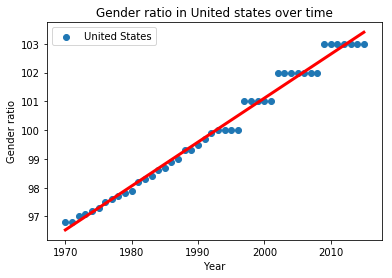

In [13]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(gen['Year'],gen['United States'])
line = [slope*xi + intercept for xi in gen['Year']]
plt.plot(gen['Year'],line,'r-', linewidth=3)
plt.scatter(gen['Year'],gen['United States'])
plt.legend()
plt.ylabel('Gender ratio')
plt.xlabel('Year')
plt.title('Gender ratio in United states over time')
plt.show()

## A3

Text(0.5,1,'Income growth over time')

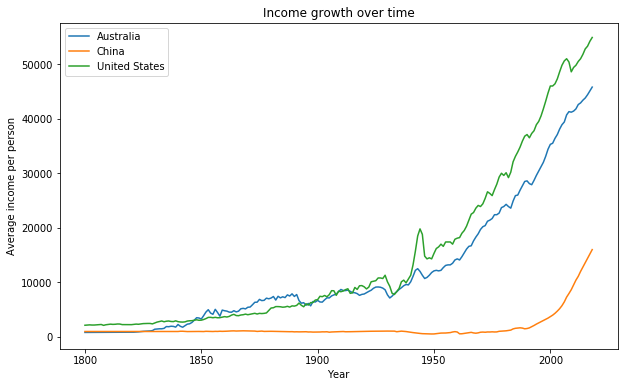

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
income = pd.read_csv('Income.csv')
inc = income[['Year','Australia','China','United States']]
fig = inc.plot(kind='line',x='Year',figsize=(10,6))
fig.set_ylabel('Average income per person')
fig.set_title('Income growth over time')

In [16]:
income.loc[income['China'] == income['China'].min(),['China','Year','Australia']]

,China,Year,Australia
149,530,1949,11800


## A4

In [6]:
population_mot = pd.melt(population,id_vars='Year',var_name='Countries',value_name='Population')
gen_mot = pd.melt(geneq,id_vars='Year',var_name='Countries',value_name='Gender ratio')
income_mot = pd.melt(income,id_vars='Year',var_name='Countries',value_name='Income')

df = pd.merge(population_mot,gen_mot,on=['Year','Countries'])
Data = pd.merge(df,income_mot,on=['Year','Countries'])

In [7]:
Data['Year'].max()

2015

In [8]:
Data['Year'].min()

1970

Text(0.5,1,'Population growth over time')

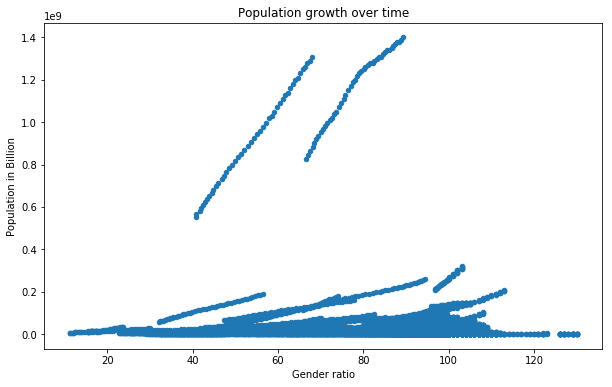

In [9]:
fig=Data.plot(x='Gender ratio', y='Population', kind='scatter',figsize=(10,6))
fig.set_ylabel('Population in Billion')
fig.set_title('Population growth over time')

Text(0.5,1,'Population growth in India over time')

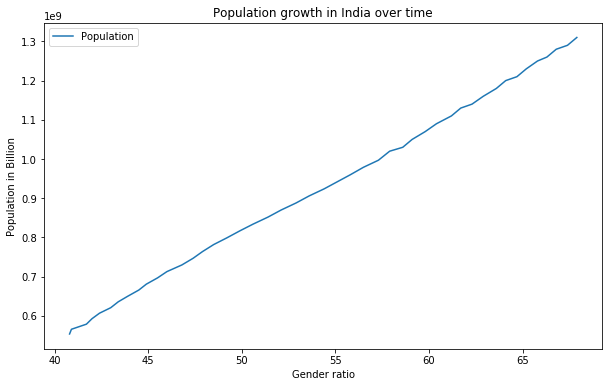

In [10]:
india = Data.loc[Data['Countries'] == 'India']
fig=india.plot(x='Gender ratio', y='Population', kind='line',figsize=(10,6))
fig.set_ylabel('Population in Billion')
fig.set_title('Population growth in India over time')

## A5

In [11]:
population_mot = pd.melt(population,id_vars='Year',var_name='Countries',value_name='Population')
gen_mot = pd.melt(geneq,id_vars='Year',var_name='Countries',value_name='Gender ratio')
income_mot = pd.melt(income,id_vars='Year',var_name='Countries',value_name='Income')

df = pd.merge(population_mot,gen_mot,on=['Year','Countries'])
Data = pd.merge(df,income_mot,on=['Year','Countries'])

In [12]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [13]:
from motionchart.motionchart import MotionChart
mChart = MotionChart(df = Data, key='Year', x='Gender ratio', y='Income', xscale='linear', yscale='linear',
                     size='Population', color='Countries', category='Countries')
mChart.to_notebook()

In [26]:
Data.set_index("Countries", inplace=True)
selected = Data.loc[['Bolivia','Cape Verde']]

from motionchart.motionchart import MotionChart
mChart = MotionChart(df = selected, key='Year', x='Gender ratio', y='Income', xscale='linear', yscale='linear',
                     size='Population', color='Countries', category='Countries')
mChart.to_notebook()

# Task B

In [30]:
import pandas as pd
rates = pd.read_csv('InsuranceRates.csv')

## B1

In [29]:
rates.shape

(12694445, 7)

In [31]:
rates.BusinessYear.unique().size

3

In [32]:
rates.Age.unique()

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'], dtype=object)

In [33]:
rates.StateCode.unique().size

39

In [34]:
rates.IssuerId.unique().size

910

In [35]:
rates['IndividualRate'].min()

0.0

In [36]:
rates['IndividualRate'].mean()

4098.026458581588

In [37]:
rates['IndividualRate'].max()

999999.0

## B2

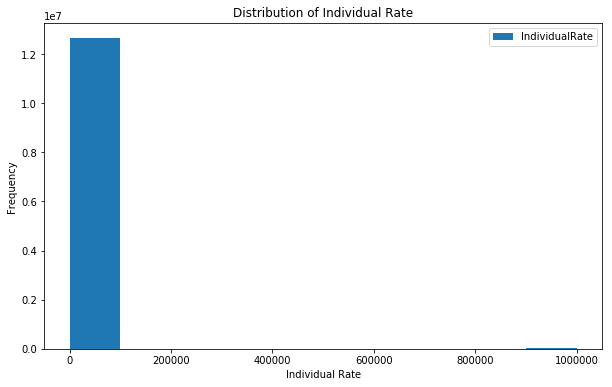

In [38]:
fig = rates.plot(kind='hist',y='IndividualRate',bins=10,figsize=(10,6))
fig.set_xlabel('Individual Rate')
fig.set_title('Distribution of Individual Rate')
plt.show()

In [39]:
rate=rates.loc[rates['IndividualRate'] >0]
rate=rate.loc[rates['IndividualRate'] <2000]
rate.size

83551139

Text(0.5,1,'Distribution of Individual Rate')

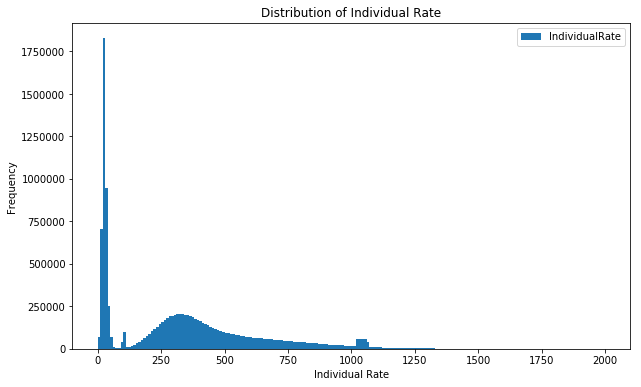

In [40]:
fig = rate.plot(kind='hist',y='IndividualRate',bins=200,figsize=(10,6))

fig.set_xlabel('Individual Rate')
fig.set_title('Distribution of Individual Rate')

## B3

Text(0.5,1,'Distribution of Insurence Rate')

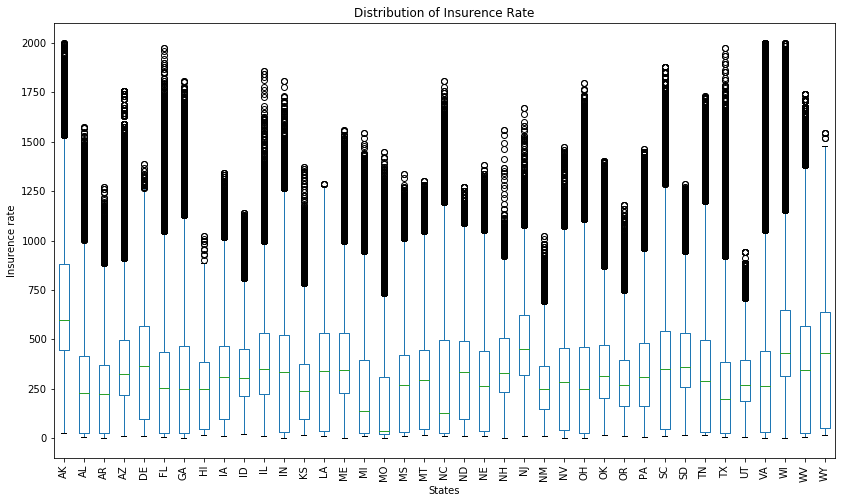

In [41]:
State = rate[['StateCode','IndividualRate']]
Values = State.pivot(columns='StateCode')['IndividualRate']
fig = Values.plot(kind='box',rot=90,figsize=(14,8))
fig.set_xlabel('States')
fig.set_ylabel('Insurence rate')
fig.set_title('Distribution of Insurence Rate')

In [78]:
issuercount=rate.groupby('StateCode').agg({'IndividualRate':{'Median cost':'median'},'IssuerId':{'Issuercount':pd.Series.nunique}})
issuercount.columns = issuercount.columns.droplevel(0)
issuercount = issuercount.reset_index()

/Users/Rajath/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Text(0.5,1,'Distribution of insurence issuers over states')

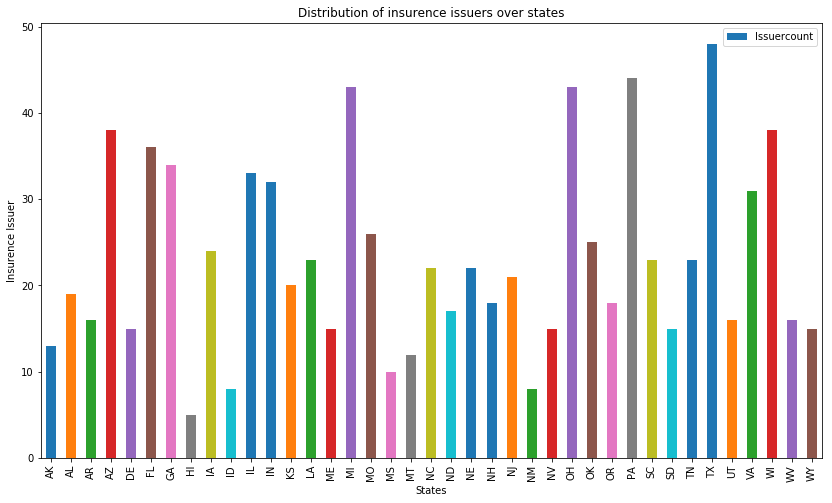

In [43]:
fig = issuercount.plot(kind='bar',x='StateCode',y='Issuercount',rot=90,figsize=(14,8))
fig.set_xlabel('States')
fig.set_ylabel('Insurence Issuer')
fig.set_title('Distribution of insurence issuers over states')

Text(0.5,1,'Distribution of Median Cost VS Issuers in each state')

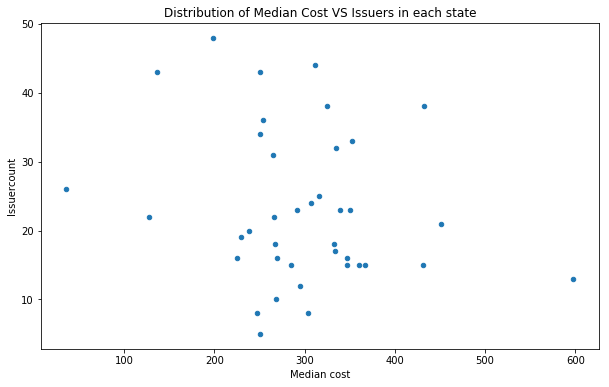

In [80]:
fig = issuercount.plot(kind='scatter',x='Median cost',y='Issuercount',figsize=(10,6))
fig.set_title('Distribution of Median Cost VS Issuers in each state')

## B4

In [46]:
age = rate[['IndividualRate','Age']]
year = rate[['IndividualRate','BusinessYear']]
ageless = age['Age'] != 'Family Option'
age = age[ageless]
year = rate[['IndividualRate','BusinessYear']]

Text(0.5,1,'Distribution of IndividualRate over Years')

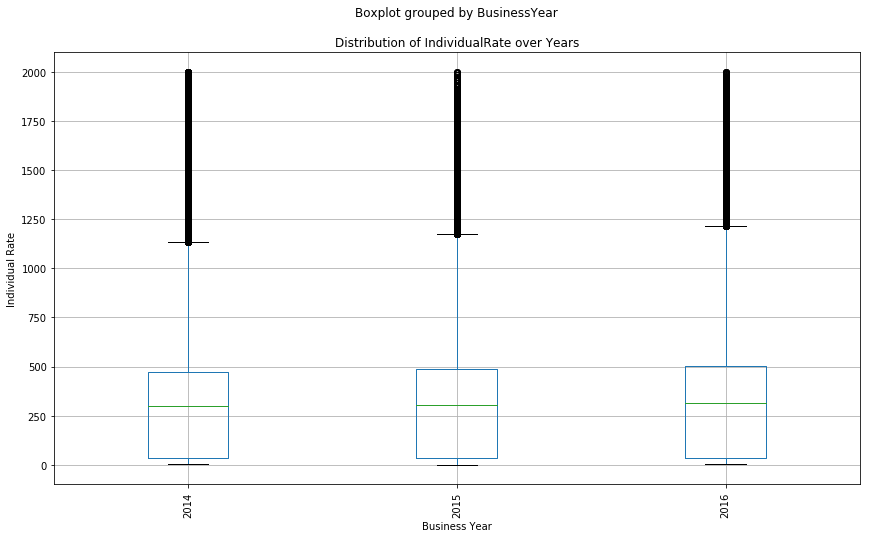

In [47]:
fig = year.boxplot(by='BusinessYear',column='IndividualRate',rot=90,figsize=(14,8))
fig.set_xlabel('Business Year')
fig.set_ylabel('Individual Rate')
fig.set_title('Distribution of IndividualRate over Years')

Text(0.5,1,'Distribution of IndividualRate over Age')

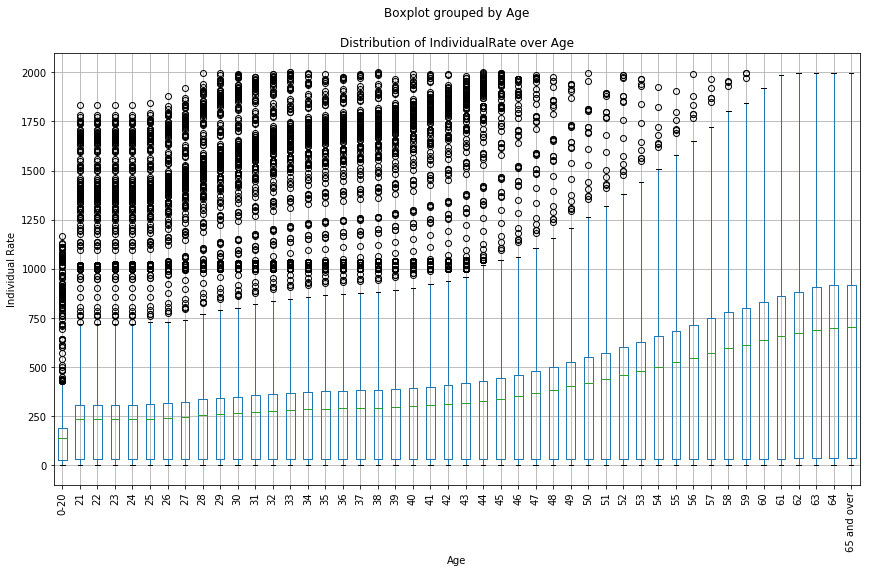

In [48]:
fig = age.boxplot(by='Age',column='IndividualRate',rot=90,figsize=(14,8))
fig.set_xlabel('Age')
fig.set_ylabel('Individual Rate')
fig.set_title('Distribution of IndividualRate over Age')

# Task C

In [49]:
import pandas as pd
import matplotlib.pyplot as plt 
crime = pd.read_csv('Crimes_-_2001_to_present.csv')

In [51]:
crime = crime.rename(columns = {'Case Number':'CaseNumber','Location Description':'LocationDescription','Primary Type':'PrimaryType','Community Area':'CommunityArea','FBI Code':'FBICode'})

In [84]:
crime.Year.unique().size

18

In [83]:
crime.ID.unique().size

6681498

In [54]:
crime.PrimaryType.unique().size

35

In [55]:
crime.Description.unique().size

380

In [56]:
crime.LocationDescription.unique().size

180

In [57]:
crime.Ward.unique().size

51

In [58]:
crime.CommunityArea.unique().size

79

In [59]:
crime.FBICode.unique().size

26

## Crime rate over the years

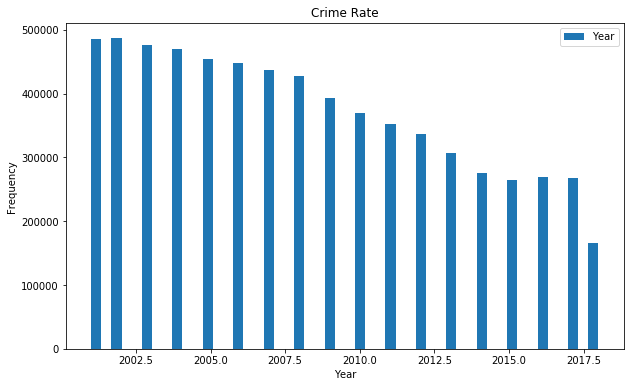

In [60]:
fig = crime.plot(kind='hist',y='Year',bins=50,figsize=(10,6))
fig.set_xlabel('Year')
fig.set_title('Crime Rate')
plt.show()

In [61]:
crimeyear=crime.groupby('Year').agg({'ID':{'CaseCount':'count'}})
crimeyear.columns = crimeyear.columns.droplevel(0)
crimeyear=crimeyear.reset_index()

/Users/Rajath/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


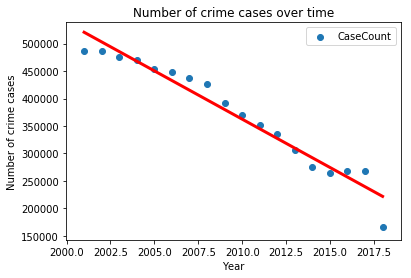

In [62]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(crimeyear['Year'],crimeyear['CaseCount'])
line = [slope*xi + intercept for xi in crimeyear['Year']]
plt.plot(crimeyear['Year'],line,'r-', linewidth=3)
plt.scatter(crimeyear['Year'],crimeyear['CaseCount'])
plt.legend()
plt.ylabel('Number of crime cases')
plt.xlabel('Year')
plt.title('Number of crime cases over time')
plt.show()

In [90]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(crimeyear[['Year']],crimeyear[['CaseCount']])
X_predict = [[2020]]
y_predict = linreg.predict(X_predict)
print('Predictive population: ',y_predict)

Predictive population:  [[5604.56496488]]


## Analysis on Primary type of Crimes

/Users/Rajath/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Text(0.5,1,'Distribution of Crime Type')

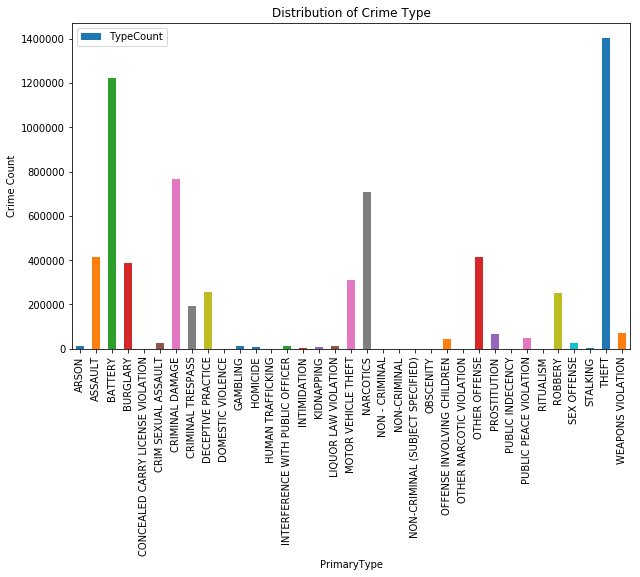

In [63]:
crimetype=crime.groupby('PrimaryType').agg({'ID':{'TypeCount':'count'}})
crimetype.columns = crimetype.columns.droplevel(0)
crimetype=crimetype.reset_index()
fig = crimetype.plot(kind='bar',x='PrimaryType',y='TypeCount',figsize=(10,6))
fig.set_ylabel('Crime Count')
fig.set_title('Distribution of Crime Type')

## Analysis on Crime Description and Location of the Crime

/Users/Rajath/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Text(0.5,1,'Distribution of Crime over locations')

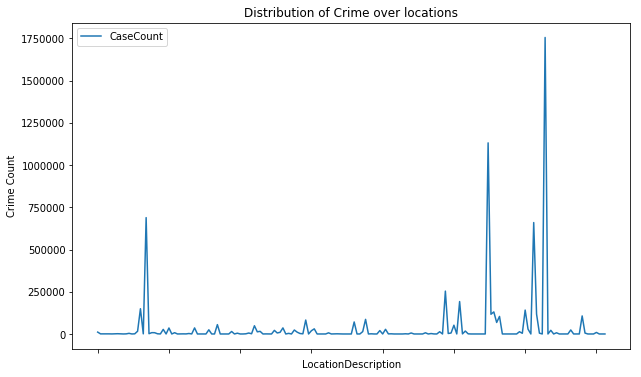

In [93]:
crimeloc=crime.groupby('LocationDescription').agg({'ID':{'CaseCount':'count'}})
crimeloc.columns = crimeloc.columns.droplevel(0)
crimeloc=crimeloc.reset_index()
fig = crimeloc.plot(kind='line',x='LocationDescription',y='CaseCount',figsize=(10,6))
fig.set_ylabel('Crime Count')
fig.set_title('Distribution of Crime over locations')

In [65]:
crimeloc.loc[crimeloc['CaseCount'] == crimeloc['CaseCount'].max(),['CaseCount','LocationDescription']]

,CaseCount,LocationDescription
157,1755878,STREET


/Users/Rajath/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Text(0.5,1,'Distribution of Crime Type')

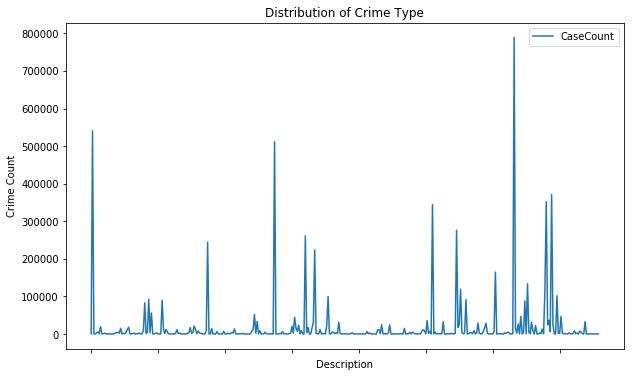

In [66]:
crimedesc=crime.groupby('Description').agg({'ID':{'CaseCount':'count'}})
crimedesc.columns = crimedesc.columns.droplevel(0)
crimedesc=crimedesc.reset_index()
fig = crimedesc.plot(kind='line',x='Description',y='CaseCount',figsize=(10,6))
fig.set_ylabel('Crime Count')
fig.set_title('Distribution of Crime Type')

In [104]:
crimedesc.loc[crimedesc['CaseCount'] == crimedesc['CaseCount'].min(),['CaseCount','Description']]

,CaseCount,Description
136,1,DISCLOSE DV VICTIM LOCATION
138,1,DOMESTIC VIOLENCE
201,1,KEEP PLACE OF JUV PROSTITUTION
212,1,LOTTERY/PARI-MUTUEL
307,1,SECOND DEGREE MURDER
322,1,SPORTS TAMPERING
331,1,THEFT RETAIL


## Identification of the Area with the highest Crime rate

/Users/Rajath/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Text(0.5,1,'Distribution of Crime Type')

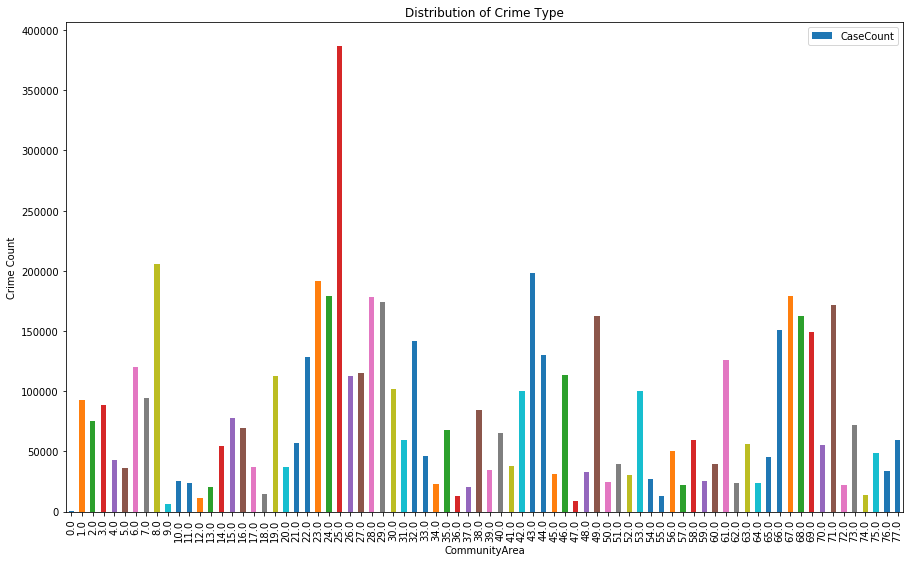

In [68]:
crimearea=crime.groupby('CommunityArea').agg({'ID':{'CaseCount':'count'}})
crimearea.columns = crimearea.columns.droplevel(0)
crimearea=crimearea.reset_index()
fig = crimearea.plot(kind='bar',x='CommunityArea',y='CaseCount',figsize=(15,9))
fig.set_ylabel('Crime Count')
fig.set_title('Distribution of Crime Type')

In [69]:
crimearea.loc[crimearea['CaseCount'] == crimearea['CaseCount'].max(),['CaseCount','CommunityArea']]

,CaseCount,CommunityArea
25,387131,25.0


In [70]:
crimearea.loc[crimearea['CaseCount'] == crimearea['CaseCount'].min(),['CaseCount','CommunityArea']]

,CaseCount,CommunityArea
0,91,0.0


## Analysis on number of successful arrests and domestic crimes

In [71]:
crime.ID.unique().size

6681498

In [72]:
crime['Arrest'].value_counts()

False    4823262
True     1858236
Name: Arrest, dtype: int64

In [73]:
crime['Domestic'].value_counts()

False    5806890
True      874608
Name: Domestic, dtype: int64